In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization
# import cv2
import random as rd

train = pd.read_csv('dataset/sign_mnist_train.csv')
test = pd.read_csv('dataset/sign_mnist_test.csv')

In [3]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


/home/sebastian/PycharmProjects/MLRobotics/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/sebastian/PycharmProjects/MLRobotics/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Test Set')

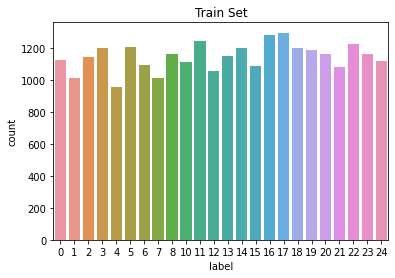

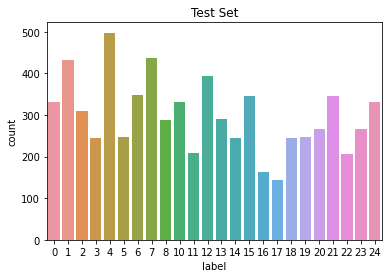

In [4]:
# quick check for distribuion of labels
import seaborn as sns
plt.figure()
sns.countplot(train['label']).set_title('Train Set')
plt.figure()
sns.countplot(test['label']).set_title('Test Set')

In [5]:
# determine y & x for our model
y_train = train['label'].values
y_test = test['label'].values

x_train = train.drop(['label'],axis=1).values
x_test = test.drop(['label'],axis=1).values

print(y_train)
print(x_train)

[ 3  6  2 ... 18 17 23]
[[107 118 127 ... 204 203 202]
 [155 157 156 ... 103 135 149]
 [187 188 188 ... 195 194 195]
 ...
 [174 174 174 ... 202 200 200]
 [177 181 184 ...  64  87  93]
 [179 180 180 ... 205 209 215]]


In [6]:
# split train data in train and validation set
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2)

In [7]:
# reshape the data
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

train_images = x_train.reshape(-1,28,28,1)
validation_images = x_validation.reshape(-1,28,28,1)
test_images = x_test.reshape(-1,28,28,1)

print(train_images.shape)
print(validation_images.shape)
print(test_images.shape)

(21964, 784)
(5491, 784)
(7172, 784)
(21964, 28, 28, 1)
(5491, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
# normalize the data
train_images = train_images/255
validation_images = validation_images/255
test_images = test_images/255

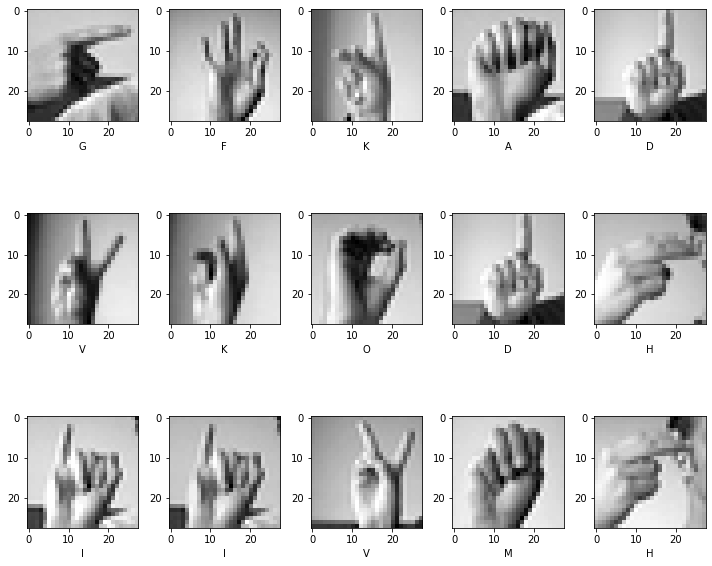

In [9]:
# print some images
f, ax = plt.subplots(3,5)
f.set_size_inches(10,10)

k = 0
for i in range(3):
    for j in range(5):
        ax[i,j].set_xlabel(chr(y_test[k] + 65))
        ax[i,j].imshow(test_images[k].reshape(28,28)
                       ,cmap='gray')
        k += 1
    plt.tight_layout()

In [10]:
# one hot encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)
y_validation = label_binrizer.fit_transform(y_validation)
y_test = label_binrizer.fit_transform(y_test)
print('First image label after encoding: ',y_train[0])

First image label after encoding:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
# data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# building the network
model = Sequential()

#CHANGE KERNEL_SIZE FROM (3,3) to 5

model.add(Conv2D(32, kernel_size=5, strides = 1, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=5, strides = 1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(24, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# used to fix 'ValueError: Failed to convert a NumPy array to a Tensor (Unsupported numpy type: NPY_INT).' for model.fit
# train_images = np.asarray(train_images).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)
#
# validation_images = np.asarray(validation_images).astype(np.float32)
# y_validation = np.asarray(y_validation).astype(np.float32)

In [16]:
# CHANGED EPOCHS FROM 50 to 10
history = model.fit(train_images,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(validation_images, y_validation),
                    verbose=1)

Epoch 1/10
344/344 [==============================] - 6s 17ms/step - loss: 1.3752 - accuracy: 0.6037 - val_loss: 2.5408 - val_accuracy: 0.1694

In [17]:
print("Train accuracy={}, Validation accuracy={}".format(
        max(history.history['accuracy']), max(history.history['val_accuracy']) ))

Train accuracy=0.9969040155410767, Validation accuracy=0.9998179078102112


In [18]:
results = model.evaluate(test_images, y_test, verbose=1)
print("test loss, test acc:", results)

225/225 [==============================] - 0s 2ms/step - loss: 0.9425 - accuracy: 0.8321


[0.9424561858177185, 0.8321249485015869]

In [19]:
# 0.8676798939704895
# 0.9308421611785889
# 0.904629111289978